In [1]:
!python3 --version

Python 3.10.12


### 🚗 Used Car Price Prediction

Data from - https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

#### 👋 Introduction

So called Second hand's car have a huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The main reason for this huge market is that when you buy a New Car and sale it just another day without any default on it, the price of car reduces by 30%.

There are also many frauds in the market who not only sale wrong but also they could mislead to wrong price.




#### 💻 Import Necessary Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [53]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
car_df = pd.read_csv("../data/vehicles.csv")

In [4]:
car_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
car_df.shape

(426880, 26)

There are almost 400,000 entries of cars listed on craigslist and have 26 attributes repreesenting the data

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

We get to know a lot from seeing this initial data.

Upon the first look, we see that many columns do not give us any good info like the *id* and *url* column

#### 🧹 Data Cleaning

Before the data is even analyzed, it needs to be cleaned. This involves handling missing values, outliers, and other data issues.

In [7]:
drop_col = ['url', 'region_url', 'title_status', 'VIN', 'size', 'image_url', 'description', 'lat','long']

We have selected a list of columns that we think can be removed.

Although, lat and long can give some crucial information, we chose to remove them since it is out of the scope for a simple machine learning model we are tryna build.

In [8]:
car_df = car_df.drop(columns=drop_col)

In [9]:
car_df = car_df.drop(columns=["id"])

In [10]:
car_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,county,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


The target variable we have to predict is the PRICE column.

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  county        0 non-null       float64
 14  state         426880 non-null  object 
 15  posting_date  426812 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 52.1+ MB


In [12]:
car_df = car_df.drop(columns=["county"])

In [13]:
car_df.shape

(426880, 15)

In [14]:
car_df = car_df.dropna()

In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115988 entries, 31 to 426878
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115988 non-null  object 
 1   price         115988 non-null  int64  
 2   year          115988 non-null  float64
 3   manufacturer  115988 non-null  object 
 4   model         115988 non-null  object 
 5   condition     115988 non-null  object 
 6   cylinders     115988 non-null  object 
 7   fuel          115988 non-null  object 
 8   odometer      115988 non-null  float64
 9   transmission  115988 non-null  object 
 10  drive         115988 non-null  object 
 11  type          115988 non-null  object 
 12  paint_color   115988 non-null  object 
 13  state         115988 non-null  object 
 14  posting_date  115988 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 14.2+ MB


We only know have a fourth of our original data after getting rid of the NAN's

In [16]:
car_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black,al,2021-05-03T14:02:03-0500
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,pickup,black,al,2021-05-03T13:41:25-0500
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,pickup,silver,al,2021-05-03T12:41:33-0500
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck,grey,al,2021-05-03T12:12:59-0500
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,pickup,red,al,2021-05-03T11:31:14-0500


#### 💻 EDA

##### Price

Since Price is the target variable let use see how price is distributed over the dataset

In [17]:
car_df["price"].max()

3736928711

In [18]:
car_df["price"].min()

0

It appears that the minimum price for some cars is listed as 0, which could indicate that, due to a mistake, these cars were erroneously marked as being available at no cost. Let us now remove those rows.

In [19]:
car_df.shape

(115988, 15)

In [20]:
car_df[car_df["price"] < 100].shape

(5365, 15)

In [21]:
car_df = car_df[car_df["price"] >= 100]

In [22]:
car_df.shape

(110623, 15)

In [23]:
non_numeric_values = pd.to_numeric(car_df['price'], errors='coerce').isna().sum()

print(f"Number of non-numeric values in 'price': {non_numeric_values}")

Number of non-numeric values in 'price': 0


In [24]:
data_types = car_df['price'].apply(type).value_counts()

print(data_types)

price
<class 'int'>    110623
Name: count, dtype: int64


In [31]:
print(car_df['price'].describe(percentiles=[0.95, 0.97, 0.98]))

count    1.106230e+05
mean     6.361625e+04
std      1.174040e+07
min      1.000000e+02
50%      1.190000e+04
95%      3.999000e+04
97%      4.499000e+04
98%      4.890000e+04
max      3.736929e+09
Name: price, dtype: float64


1. **Extremely High Maximum Value**
   - The maximum price is `3.736929e+09` (approximately 3.74 billion).
   - This value is extraordinarily high for car prices and suggests outliers

2. **Percentile Values**
   - The 95th, 97th, and 98th percentile values are `3.999000e+04`, `4.499000e+04`, and `4.890000e+04`, respectively.
   - These values are reasonable for high-end car prices but are much lower than the maximum value.
   - It highlights that the extremely high maximum price is an outlier.

We now remove these outliers too

In [40]:
car_df[car_df["price"] >= 200900]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,posting_date
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,automatic,rwd,pickup,white,ca,2021-04-11T11:40:08-0700
68935,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,automatic,fwd,sedan,green,ca,2021-04-06T16:40:31-0700
136516,spokane / coeur d'alene,17000000,2007.0,ram,2500,good,8 cylinders,diesel,170000.0,automatic,4wd,pickup,black,id,2021-05-02T19:27:17-0700
137807,spokane / coeur d'alene,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,automatic,fwd,sedan,white,id,2021-04-29T08:48:15-0700
155421,terre haute,1234567,2006.0,jeep,wrangler,like new,6 cylinders,gas,123456.0,automatic,4wd,SUV,custom,in,2021-04-18T11:26:55-0400
219241,southwest MS,1111111,1970.0,dodge,challenger,fair,8 cylinders,gas,42000.0,automatic,rwd,coupe,blue,ms,2021-04-11T19:04:00-0500
230753,asheville,135008900,2008.0,nissan,titan se kingcab,like new,8 cylinders,gas,110500.0,automatic,4wd,truck,grey,nc,2021-04-16T19:22:21-0400
307488,stillwater,123456789,1996.0,gmc,sierra 2500,fair,8 cylinders,gas,320000.0,automatic,4wd,pickup,black,ok,2021-04-07T12:44:56-0500
318592,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,automatic,4wd,pickup,silver,or,2021-04-16T18:16:12-0700


These prices in the following dataframe look very much made up. So let us remove them 

In [42]:
car_df.shape

(110623, 15)

In [43]:
car_df = car_df[car_df["price"] <= 200900]

In [44]:
car_df.shape

(110614, 15)

In [45]:
print(car_df['price'].describe(percentiles=[0.75, 0.90, 0.95]))

count    110614.000000
mean      16147.254163
std       13342.197832
min         100.000000
50%       11900.000000
75%       23824.000000
90%       35590.000000
95%       39990.000000
max      195000.000000
Name: price, dtype: float64


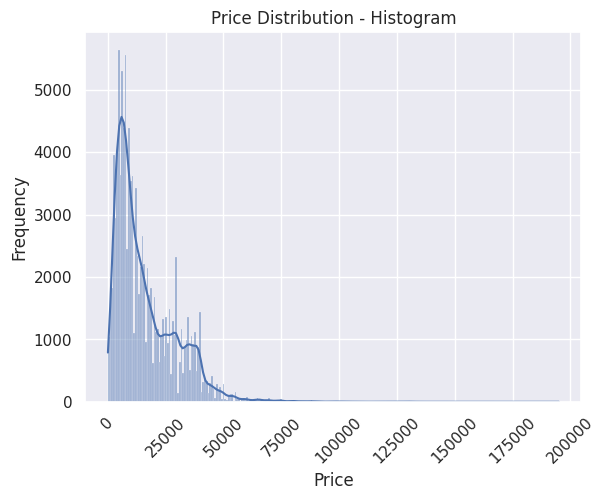

In [56]:
sns.histplot(car_df['price'], kde=True)
plt.xticks(rotation=45) # kde=True adds a Kernel Density Estimate plot
plt.title('Price Distribution - Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Car Price Data Inferences

- **Right-Skewed Distribution**: The histogram displays a right-skewed distribution of car prices, suggesting the presence of a few vehicles with prices significantly higher than the bulk of the data. These high-priced cars are not representative of the general dataset.

- **Common Price Range**: A significant clustering of car prices at the lower end of the price range is evident. This concentration indicates that the majority of cars fall within a more economical or affordable price bracket.

##### Region

In [68]:
len(car_df["region"].value_counts())

403

We see that there are 403 different regions in which the cars are sold 

In [61]:
car_df.groupby('region')['price'].mean()

region
SF bay area               17292.801307
abilene                   14877.657143
akron / canton            13146.716102
albany                    17962.430057
albuquerque               17581.487909
                              ...     
york                      15680.216346
youngstown                14085.419087
yuba-sutter               20095.484848
yuma                       9882.813559
zanesville / cambridge    19155.217391
Name: price, Length: 403, dtype: float64

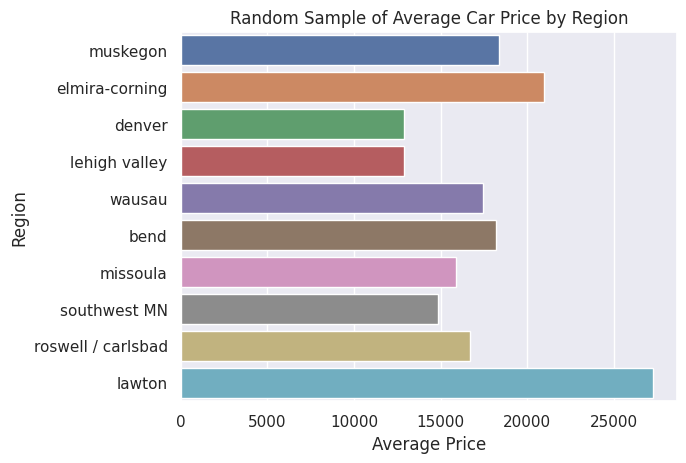

In [70]:
random_regions = car_df.groupby('region')['price'].mean().sample(n=10, random_state=7).reset_index()

sns.barplot(x='price', y='region', data=random_regions)

# Set the title and labels
plt.title('Random Sample of Average Car Price by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')

# Show the plot
plt.show()
